# IMPORT LIBRARIES

In [1]:
import pandas as pd          # for handling tabular data
import numpy as np           # for numerical operations
import matplotlib.pyplot as plt  # for plotting charts
import seaborn as sns        # for prettier and easier visualization
from sklearn.cluster import KMeans  # for clustering

C:\Users\sarah\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# LOAD DATASET

In [2]:
data = pd.read_csv('Mall_Customers[1].csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EXPLORING AND CLEANING DATA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# RENAMING COLUMNS FOR SIMPLICITY

In [21]:
data.rename(columns={
    'CustomerID': 'ID',
    'Genre': 'Gender',
    'Age': 'Age',
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'Score'
}, inplace=True)

# VISUALIZE THE DATA

In [22]:
print(data['Gender'].unique())
print(data['Gender'].dtype)


['Male' 'Female']
object


In [23]:
# Convert Gender to string if it's not
data['Gender'] = data['Gender'].astype(str)

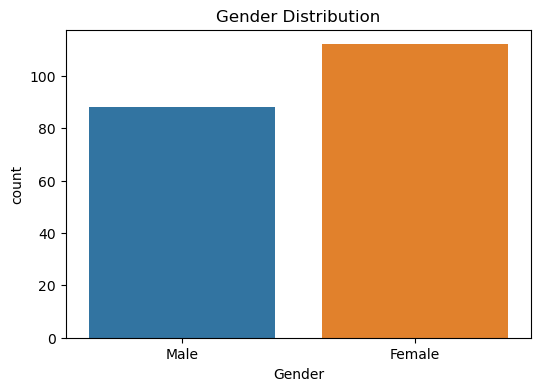

In [24]:
# Step 5: Plot the gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data)
plt.title("Gender Distribution")
plt.show()


Text(0.5, 1.0, 'Customer Distribution by Income and Spending Score')

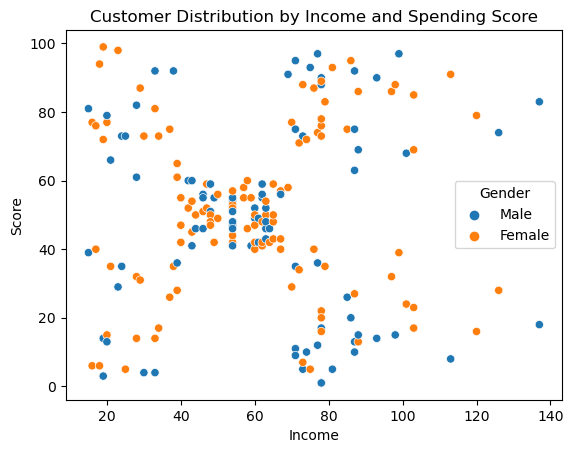

In [25]:
sns.scatterplot(x='Income', y='Score', data=data, hue='Gender')
plt.title('Customer Distribution by Income and Spending Score')

# FEATURES FOR CLUSTERING

In [26]:
X = data[['Income', 'Score']]

# FINDING OPTIMAL NUMBER OF CLUSTERS (ELBOW METHOD)

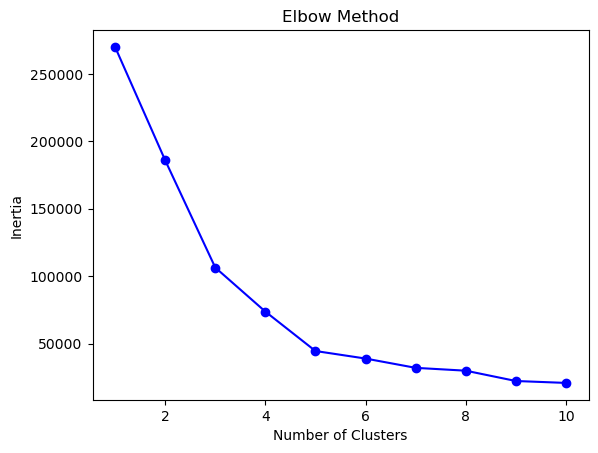

In [27]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# APPLY K MEANS WITH OPTIMAL K

In [28]:
kmeans = KMeans(n_clusters=5, random_state=0)
data['Cluster'] = kmeans.fit_predict(X)

# VISUALIZE THE CLUSTERS

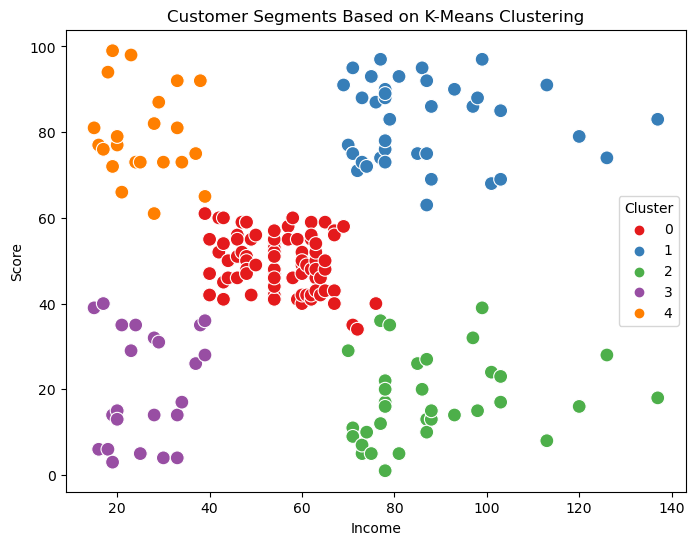

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Income', y='Score',
    hue='Cluster',
    palette='Set1',
    data=data,
    s=100
)
plt.title("Customer Segments Based on K-Means Clustering")
plt.show()